<a href="https://colab.research.google.com/github/Utpal-Mishra/Omdena-Malaysia-2021-Climate-Risk-Prediction-Part1/blob/main/OmdenaMalaysia2021ClimateRiskPredictionPart1KUCHING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

print("Drive Mounted!!!")

Mounted at /content/drive
Drive Mounted!!!


### **IMPORT LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot

!pip install pmdarima

print("Libraries Imported!!!")

     |████████████████████████████████| 1.5 MB 9.3 MB/s 
     |████████████████████████████████| 9.5 MB 39.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Libraries Imported!!!


### **IMPORT DATA**

In [3]:
path = "/content/drive/MyDrive/Omdena/Malaysia 2021/Task 1 Climate Risk Prediction/14StationsData.csv"

data = pd.read_csv(path)
print("Data Shape: ", data.shape)
data.head()

Data Shape:  (194296, 10)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,MYM00096471,"KOTA KINABALU INTERNATIONAL, MY",5.937,116.051,3.0,1981-01-01,7.9,26.8,31.0,23.0
1,MYM00096471,"KOTA KINABALU INTERNATIONAL, MY",5.937,116.051,3.0,1981-01-02,0.0,26.5,31.0,24.0
2,MYM00096471,"KOTA KINABALU INTERNATIONAL, MY",5.937,116.051,3.0,1981-01-03,31.0,25.9,30.0,24.0
3,MYM00096471,"KOTA KINABALU INTERNATIONAL, MY",5.937,116.051,3.0,1981-01-04,14.0,26.6,29.0,23.0
4,MYM00096471,"KOTA KINABALU INTERNATIONAL, MY",5.937,116.051,3.0,1981-01-05,0.5,27.1,31.0,24.0


## **EXPLORATORY DATA ANALYSIS**

### **Checking Missing Values**

In [4]:
data.isna().sum()

STATION          0
NAME             0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
DATE             0
PRCP         30373
TAVG          2893
TMAX         71659
TMIN         78357
dtype: int64

### **Replacing Missing Values with Column Means**

In [5]:
data = data.fillna(data.mean())
print("Empty Values Left: ", data.isna().sum().sum())

Empty Values Left:  0


### **Frequency of Station Names in Malaysia**

In [6]:
data.NAME.value_counts()

KUCHING, MY                                 14797
SANDAKAN, MY                                14792
LABUAN, MY                                  14791
SITIAWAN, MY                                14788
PENANG INTERNATIONAL, MY                    14756
KUANTAN, MY                                 14755
MALACCA, MY                                 14696
SULTAN ISMAIL PETRA, MY                     14686
SIBU, MY                                    14639
KOTA KINABALU INTERNATIONAL, MY             14607
MIRI, MY                                    14592
SULTAN ABDUL AZIZ SHAH INTERNATIONAL, MY    13952
TAWAU, MY                                   12410
KUALA LUMPUR INTERNATIONAL, MY               6035
Name: NAME, dtype: int64

### **DATA ANALYSIS and INTERPRETATION**

In [7]:
import datetime

data["YEAR"] = data.DATE.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)
data["MONTH"] = data.DATE.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)

cleandata = data.groupby(['NAME', 'YEAR'], as_index = False).first()
print("Data Dimensions: ", cleandata.shape)
cleandata.tail()

Data Dimensions:  (543, 12)


,NAME,YEAR,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,MONTH
538,"TAWAU, MY",2017,MYM00096481,4.313,118.122,17.4,2017-01-01,5.300000,25.6,30.900000,23.737928,1
539,"TAWAU, MY",2018,MYM00096481,4.313,118.122,17.4,2018-01-01,8.021009,27.0,31.793158,22.900000,1
540,"TAWAU, MY",2019,MYM00096481,4.313,118.122,17.4,2019-01-01,4.100000,27.2,31.793158,23.500000,1
541,"TAWAU, MY",2020,MYM00096481,4.313,118.122,17.4,2020-01-01,8.021009,28.0,31.793158,23.737928,1
542,"TAWAU, MY",2021,MYM00096481,4.313,118.122,17.4,2021-01-01,4.300000,25.4,31.793158,23.737928,1


In [8]:
fig = go.Figure()
fig = px.bar(cleandata, x='NAME', y="TAVG", animation_frame = "DATE", color = "TAVG", text='TAVG')
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_xaxes(title_text = "State Names in Malaysia", linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Temperature", showline=True, linewidth=1, linecolor='black', mirror=True)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(height=600, width=1200, title_text="Temperature in Malaysia", barmode='group', xaxis_tickangle=-45, yaxis_range=[0,120]) 
fig.show()

In [9]:
# fig = go.Figure()
# fig = px.bar(cleandata, x='NAME', y="PRCP", animation_frame = "DATE", color = "PRCP", text='PRCP')
# # fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
# fig.update_xaxes(title_text = "State Names in Malaysia", linewidth=1, linecolor='black', mirror=True)
# fig.update_yaxes(title_text = "Precipitation", showline=True, linewidth=1, linecolor='black', mirror=True)
# # fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(height=600, width=1200, title_text="Precipitation in Malaysia", barmode='group', xaxis_tickangle=-45, yaxis_range=[0,120]) 
# fig.show()

fig = go.Figure()
fig = px.scatter(cleandata, x="NAME", y="PRCP", animation_frame="DATE",
           size="PRCP", color="NAME", hover_name="NAME",
           log_x=False, range_y=[0, 120])
fig.update_xaxes(title_text = "State Names in Malaysia", linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Precipitation", showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(height=600, width=1500, title_text="Precipitation in Malaysia", barmode='group', xaxis_tickangle=-45, yaxis_range=[0,120]) 
fig.show()

## **PLOTS**

### **Plotting Functions**

In [10]:
def temperature(df):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df.DATE, y=df.TAVG, mode='lines', name='tavg lines'))
  fig.add_trace(go.Scatter(x=df.DATE, y=df.TMIN, mode='lines', name='tmin lines'))
  fig.add_trace(go.Scatter(x=df.DATE, y=df.TMAX, mode='lines', name='tmax lines'))
  fig.update_xaxes(title_text = "DATE", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_layout(height=450, width=1000, title_text="Observation of Tmin, Tavg, Tmax in Different Parts of Malaysia") 
  fig.show()


def precipitation(df):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df.DATE, y=df.PRCP, mode='lines', name='tavg lines'))
  fig.update_xaxes(title_text = "DATE", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(title_text = "PRECIPITATION", showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_layout(height=450, width=1000, title_text="Precipitation in Parts of Malaysia") 
  fig.show()



def map(df):
  fig = px.scatter_geo(df, 
                     lat='LATITUDE', 
                     lon='LONGITUDE', 
                     size='PRCP', 
                     animation_frame="DATE", 
                     title='PRECIPITATION in MALAYSIA', 
                     projection = "orthographic", 
                     width = 1000,
                     height = 500, 
                     color = "NAME")
  fig.update(layout_coloraxis_showscale=False)
  fig.show()

In [11]:
map(cleandata)

### **KUCHING, MY** 

**TEMPERATURE ANALYSIS**

In [12]:
df = data[data.NAME == "KUCHING, MY"]

temperature(df)

**PRECIPITATION**

In [13]:
precipitation(df)

In [14]:
map(df.head(100))

# **FORECASTING**

## **ARIMA MODEL: Forecasting Precipitation**

In [15]:
forecast = data[data.NAME == "KUCHING, MY"][["DATE", "PRCP"]]
forecast.set_index('DATE',inplace=True)
forecast

,PRCP
DATE,
1981-01-01,31.0
1981-01-02,8.0
1981-01-03,17.0
1981-01-04,5.0
1981-01-05,36.0
...,...
2021-07-09,0.0
2021-07-10,0.0
2021-07-11,0.0


In [16]:
forecast.describe()

,PRCP
count,14797.000000
mean,11.765160
std,21.595839
min,0.000000
25%,0.000000
50%,4.000000
75%,13.000000
max,396.000000


In [17]:
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast.PRCP, name = "Precipitation Record", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "PRECIPIATION", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Precipitation Record')
fig.show()

In [18]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(forecast.PRCP)

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast.PRCP)

ADF Test Statistic : -18.69696653382867
p-value : 2.037886931453752e-30
#Lags Used : 23
Number of Observations Used : 14773
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


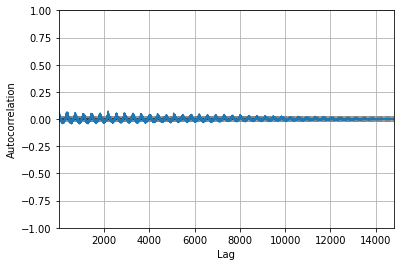

In [19]:
autocorrelation_plot(forecast.PRCP)
plt.show()

In [20]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(forecast.PRCP, order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.PRCP   No. Observations:                14796
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -66151.812
Method:                       css-mle   S.D. of innovations             21.156
Date:                Thu, 05 Aug 2021   AIC                         132311.623
Time:                        10:24:44   BIC                         132342.032
Sample:                             1   HQIC                        132321.719
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          8.92e-05      0.006      0.014      0.989      -0.012       0.012
ar.L1.D.PRCP     0.1384      0.009     15.949      0.000       0.121       0.155
ma.L1.D.PRCP    -0.9693      0.003   -368.835      0.000      -0.974      -0.964
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.2234           +0.0000j            7.2234            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(forecast.PRCP, order=(5, 1, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-01-01", end = "2021-07-13", dynamic=True)
# forecast[['PRCP','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['PRCP'], name = "Recorded Precipitation", line=dict(color='blue', width=3, dash = "dot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Precipitation Record", line=dict(color='red', width=3, dash = "dashdot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "PRECIPIATION", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Seasonal First Difference Precipitation Record')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [22]:
prediction = pd.DataFrame(results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True))
prediction.rename(columns = {"predicted_mean":'Predicted PRCP'}, inplace = True)
prediction

,Predicted PRCP
DATE,
2021-01-01,4.080334
2021-01-02,1.794971
2021-01-03,1.768712
2021-01-04,1.993346
2021-01-05,2.279988
...,...
2021-07-09,2.186489
2021-07-10,2.186489
2021-07-11,2.186489


In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['PRCP'], mode='lines+markers', name = "Recorded Precipitation", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted PRCP'], name = "Predicted Precipitation", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "PRECIPIATION", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Precipitation Prediction')
fig.show()

In [24]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(forecast['PRCP'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=132259.581, Time=35.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=132922.652, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132424.480, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=132492.332, Time=6.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136766.551, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=132198.626, Time=28.93 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=132397.687, Time=9.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=132259.970, Time=11.96 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=132185.537, Time=33.73 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=132356.059, Time=11.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=41.23 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=132184.094, Time=45.44 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=132330.352, Time=14.53 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=50.03 sec
 ARIMA(1,0

## **ARIMA MODEL: Forecasting Temperature**

In [25]:
forecast = data[data.NAME == "KUCHING, MY"][["DATE", "TAVG"]]
forecast.set_index('DATE',inplace=True)
forecast

,TAVG
DATE,
1981-01-01,24.7
1981-01-02,24.8
1981-01-03,25.1
1981-01-04,25.6
1981-01-05,26.0
...,...
2021-07-09,28.8
2021-07-10,28.6
2021-07-11,26.7


In [26]:
forecast.describe()

,TAVG
count,14797.000000
mean,26.490315
std,1.169255
min,22.500000
25%,25.700000
50%,26.400000
75%,27.300000
max,31.400000


In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast.TAVG, name = "Precipitation Record", line=dict(color='firebrick', width=4)))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Precipitation Record')
fig.show()

In [28]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(forecast.TAVG)

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast.TAVG)

ADF Test Statistic : -8.231489602916442
p-value : 6.046079566458241e-13
#Lags Used : 42
Number of Observations Used : 14754
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


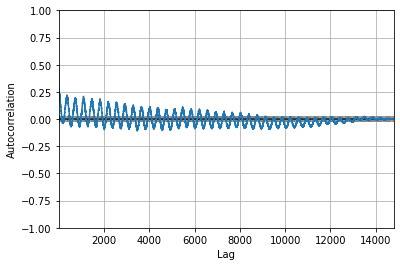

In [29]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(forecast.TAVG)
plt.show()

In [30]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(forecast.TAVG, order=(1,1,1))
model_fit = model.fit()

model_fit.summary()

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(forecast.TAVG, order=(5, 1, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-01-01", end = "2021-07-13", dynamic=True)
# forecast[['PRCP','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['TAVG'], name = "Recorded Recipitation", line=dict(color='blue', width=3, dash = "dash")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Precipitation Record", line=dict(color='red', width=3, dash = "dot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Seasonal First Difference Precipitation Record')
fig.show()

In [ ]:
prediction = pd.DataFrame(results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True))
prediction.rename(columns = {"predicted_mean":'Predicted TAVG'}, inplace = True)
prediction

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['TAVG'], name = "Recorded Temperature", line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted TAVG'], name = "Predicted Temperature", line=dict(color='red', width=2)))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Precipitation Prediction')
fig.show()